# Unsupervised Learning

*Author : maxime.savary@orange.com (v1.0 December 2020)*

In unsupervised learning, the output data is not tagged. We only have $X$ inputs and no output. There is no "correct" answer a priori. The objective is to model the distribution of data

![image](./images/ML-superv-vs-unsuper.png)



For a first comprehension, Unsupervised problems can be grouped in :
* **Clustering** : Finding Groups in Data. Algo = K-Means
* **Association** : Rules associating large portions of data. Algo = PCA (Principal Component Analysis), ICA, ...

The objective is to find the organizational structures = **Clusters**. To do that the we can use **kmeans**


## K-Means

K-Means is the most popular Clustering Algorithm. It is easy to implement and can be applied to large data sets. We have as input the $data$ and $k$ representing the number of clusters

The problem is to split the data into $k$ groups by seeking to minimize the distance between the points within each cluster :
* Given a set of points $\{x^{(1)},x^{(2)}, ... , x^{(m)}\}$
* Fix $C = \{c^{(1)},c^{(2)}, ... , c^{(k)}\}$ 
* We want $\underset{C}{min}\sum_{i=1}^{k}\sum_{x_j\in c_i}\lVert  x_j-\mu_i\rVert^2$
* *$\mu_i$ barycenter of $c^{(i)}$*


### K-Means Algorithm :

```python

Let D a set of points

Initialize K (< m) clusters with barycenter 𝜇_1,𝜇_2, ….,𝜇_𝑘  𝜖〖 ℝ〗^𝑵

Repeat until convergence { 
  for i = 1 to m point
          𝑐^((𝑖) ) = index (for 1 to K) from the nearest cluster center of 𝑥^((𝑖) )  
  for k = 1 to K
    𝜇_𝑘 = calculation of the barycenter coordinates 𝑐^((𝑘) )
} 

```
<br/><br/>

![image](./images/ML-kmeans.png)


### Python demo :

By default, the kmeans Algo. initializes the centers of $k$ clusters as far as possible from each other


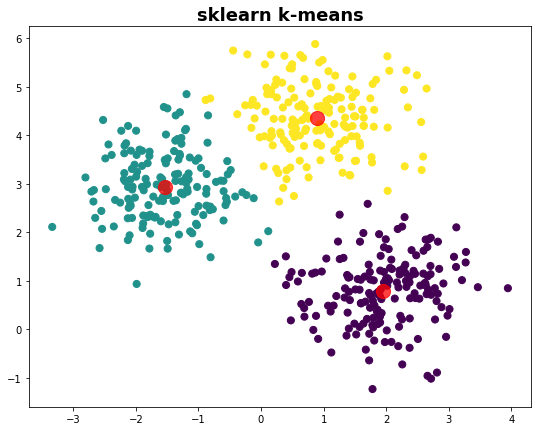

In [2]:
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


k = 3
n_draws = 500
sigma = .7
random_state = 0
dot_size = 50
cmap = 'viridis'

X, y_true = make_blobs(n_samples = n_draws,
                       centers = k,
                       cluster_std = sigma,
                       random_state = random_state)


kmeans = KMeans(n_clusters=k, max_iter=10)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# visualize prediction
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=dot_size, cmap=cmap)

# get centers for plot
centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)
plt.title('sklearn k-means', fontsize=18, fontweight='demi')


plt.show()